In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def f_true(u_k, m):
    """
    Returns u_dot = f(u, t). 
    
    Parameters
    ----------
    u_k : array_like
        Current state vector [r1, r2, r3, v1, v2, v3]
    m : array_like
        Mass of body 1, 2, 3 [m1, m2, m3]
    Returns
    -------
    u_dot : array
        Vector of output dynamics for a given u and t, where the first element represents prey dynamics and the second element represent predator dynamics [u_dot1, u_dot2]
    """
    r_1 = u_k[0]
    r_2 = u_k[1]
    r_3 = u_k[2]
    r_dot_1 = u_k[3]
    r_dot_2 = u_k[4]
    r_dot_3 = u_k[5]
    
    r = [r_1, r_2, r_3]
    
    G = 6.67408e-11
    
    r_ddot = np.zeros([3, 3])
    
    for i in range(0, 3):
        for j in range(0, 3):
            if i != j:
                r_ddot[i] += (G*m[j]*(r[j]-r[i]))/((np.linalg.norm(r[j]-r[i]))**3)      
    
    u_k_dot = np.array([r_dot_1, r_dot_2, r_dot_3, r_ddot[0], r_ddot[1], r_ddot[2]])
    
    return u_k_dot

In [3]:
def rk_4(u_k, m, delta_t):
    """
    Returns the k+1 th state. A.k.a u_k+1 
    
    Parameters
    ----------
    u_k : array_like
        Current state vector [r1, r2, r3, v1, v2, v3]
    m : array_like
        Mass of body 1, 2, 3 [m1, m2, m3]
    delta_k : float_like 
        Time step 
    Returns
    -------
    u_kplus1 : array
    
    """
    y1 = f_true(u_k, m)
    y2 = f_true(u_k + 0.5*delta_t*y1, m)
    y3 = f_true(u_k + 0.5*delta_t*y2, m)
    y4 = f_true(u_k + delta_t*y3, m)
    u_kplus1 = u_k + (1/6)*delta_t*(y1+2*y2+2*y3+y4)
    
    return u_kplus1  

In [4]:
def ab_4(u_0, m, T, delta_t):
    
    times = np.arange(0, T + delta_t / 2, delta_t)
    u = np.ndarray((len(times),  6, 3))
    for i in range(len(times)):
        if i == 0:
            u[i] = u_0
        elif i == 1:
            u[i] = rk_4(u[0], m, delta_t)        
        elif i == 2:
            u[i] = rk_4(u[1], m, delta_t)
        elif i == 3:
            u[i] = rk_4(u[2], m, delta_t)
        else:
            u[i] = u[i-1] + delta_t*(1/24)*(-9*f_true(u[i-4], m)+37*f_true(u[i-3], m)-59*f_true(u[i-2], m)+55*f_true(u[i-1], m))
    
    return u, times

In [5]:
def ab_4_error_against_baseline(u_0, m, T, delta_t, delta_t_baseline):

    u_delta_t, times1 = ab_4(u_0, m, T, delta_t)
    u_final_delta_t = u_delta_t[len(u_delta_t)-1]

    u_delta_t_baseline, times2 = ab_4(u_0, m, T, delta_t_baseline)
    u_final_delta_t_baseline = u_delta_t_baseline[len(u_delta_t_baseline)-1]

    top = u_final_delta_t - u_final_delta_t_baseline
    bottom = u_final_delta_t_baseline

    err = np.linalg.norm(top)/np.linalg.norm(bottom)

    return err

In [6]:
def rk_4_sim(u_0, m, T, delta_t):
    
    times = np.arange(0, T + delta_t / 2, delta_t)
    u = np.ndarray((len(times),  6, 3))
    u[0] = u_0

    for i in range(len(times)-1):
        u[i+1] = rk_4(u[i], m, delta_t)

    return u, times

In [7]:
def rk4_error_against_baseline(u_0, m, T, delta_t, delta_t_baseline):

    u_delta_t, times1 = rk_4_sim(u_0, m, T, delta_t)
    u_final_delta_t = u_delta_t[len(u_delta_t)-1]

    u_delta_t_baseline, times2 = rk_4_sim(u_0, m, T, delta_t_baseline)
    u_final_delta_t_baseline = u_delta_t_baseline[len(u_delta_t_baseline)-1]

    top = u_final_delta_t - u_final_delta_t_baseline
    bottom = u_final_delta_t_baseline

    err = np.linalg.norm(top)/np.linalg.norm(bottom)

    return err

In [8]:
def ab_2(u_0, m, T, delta_t):
    
    times = np.arange(0, T + delta_t / 2, delta_t)
    u = np.ndarray((len(times), 6, 3))
    for i in range(len(times)):
        if i == 0:
            u[i] = u_0
        elif i == 1:
            u[i] = rk_4(u[0], m, delta_t)
        else:
            u[i] = u[i-1]+(delta_t/2)*(3*f_true(u[i-1], m)-f_true(u[i-2], m))
    
    return u, times

In [9]:
def ab2_error_against_baseline(u_0, m, T, delta_t, delta_t_baseline):

    u_delta_t, times1 = ab_2(u_0, m, T, delta_t)
    u_final_delta_t = u_delta_t[len(u_delta_t)-1]

    u_delta_t_baseline, times2 = ab_2(u_0, m, T, delta_t_baseline)
    u_final_delta_t_baseline = u_delta_t_baseline[len(u_delta_t_baseline)-1]

    top = u_final_delta_t - u_final_delta_t_baseline
    bottom = u_final_delta_t_baseline

    err = np.linalg.norm(top)/np.linalg.norm(bottom)

    return err

# RK4 vs AB4 Error Convergence Plots

In [27]:
# FOR SUN, EARTH, MOON SIM: 
m1 = 1.989e30 # Sun 
m2 = 5.9724e24 # Earth 
m3 = 7.35e22 # Moon
r_1 = np.array([0, 0, 0]) # Sun
r_2 = np.array([0, -1.47095e11, 0]) # Earth at Perihelion
r_3 = np.array([0, -1.47095e11 - 0.4055e9 , 0]) # Assume the Moon is at apogee and Sun, Earth, Moon are colinear 
r_dot_1 = np.array([0, 0.10, 0]) 
r_dot_2 = np.array([30.29e3, 0, 0]) # Earth at maximum orbital velocity 
r_dot_3 = np.array([30.29e3 + 0.970e3, 0, 0]) # Assume the Moon has minimum orbital velocity at apogee

u_0 = [r_1, r_2, r_3, r_dot_1, r_dot_2, r_dot_3]
m = [m1, m2, m3]

ab_4_err = []
rk4_err = []
ab2_err = []

delta_ts = [10, 100, 1000, 10000]
delta_t_baseline = 5
T = 20000

for item in range(len(delta_ts)):
    ab_4_err.append(ab_4_error_against_baseline(u_0, m, T, delta_ts[item], delta_t_baseline))

for item in range(len(delta_ts)):
    rk4_err.append(rk4_error_against_baseline(u_0, m, T, delta_ts[item], delta_t_baseline))
    
for item in range(len(delta_ts)):
    ab2_err.append(ab2_error_against_baseline(u_0, m, T, delta_ts[item], delta_t_baseline))

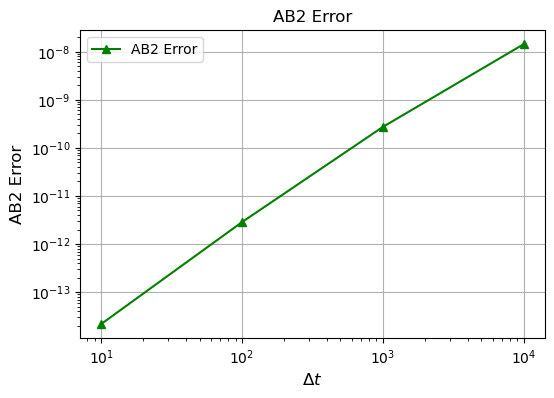

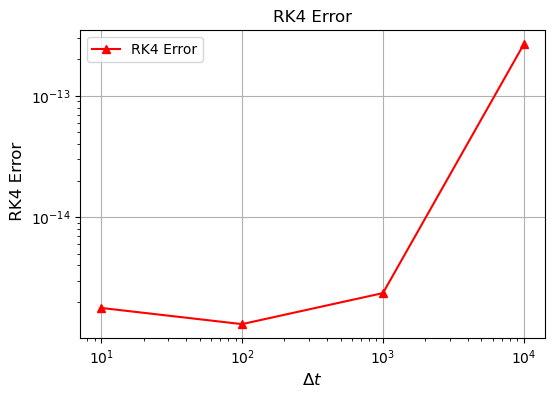

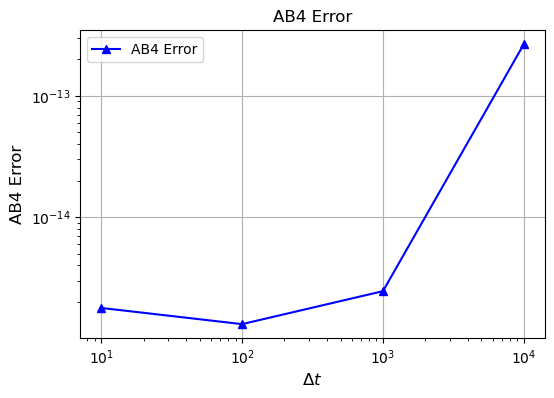

In [86]:
fig = plt.figure(figsize=(6, 4))
ax2 = fig.add_subplot(111)
ax2.plot(delta_ts, ab2_err, 'g-^', label='AB2 Error')
ax2.set_xlabel('$\Delta t$', fontsize = 12)
ax2.set_ylabel('AB2 Error', fontsize = 12)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('AB2 Error')
ax2.legend()
ax2.grid()
plt.savefig('ab2 error')

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)
ax1.plot(delta_ts, rk4_err, 'r-^', label='RK4 Error')
ax1.set_xlabel('$\Delta t$', fontsize = 12)
ax1.set_ylabel(' RK4 Error', fontsize = 12)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('RK4 Error')
ax1.legend()
ax1.grid()
plt.savefig('rk4 error')

fig = plt.figure(figsize=(6, 4))
ax3 = fig.add_subplot(111)
ax3.plot(delta_ts, ab_4_err, 'b-^', label='AB4 Error')
ax3.set_xlabel('$\Delta t$', fontsize = 12)
ax3.set_ylabel('AB4 Error', fontsize = 12)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_title('AB4 Error')
ax3.legend()
ax3.grid()
plt.savefig('ab4 error')

# Simulate 28 days of Sun, Earth, Moon Orbit using RK4 and AB4 

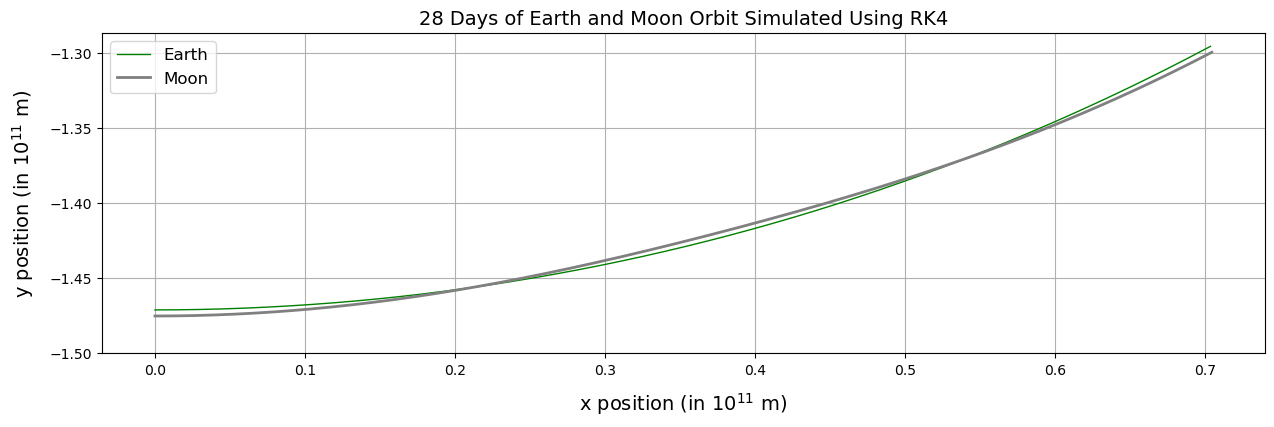

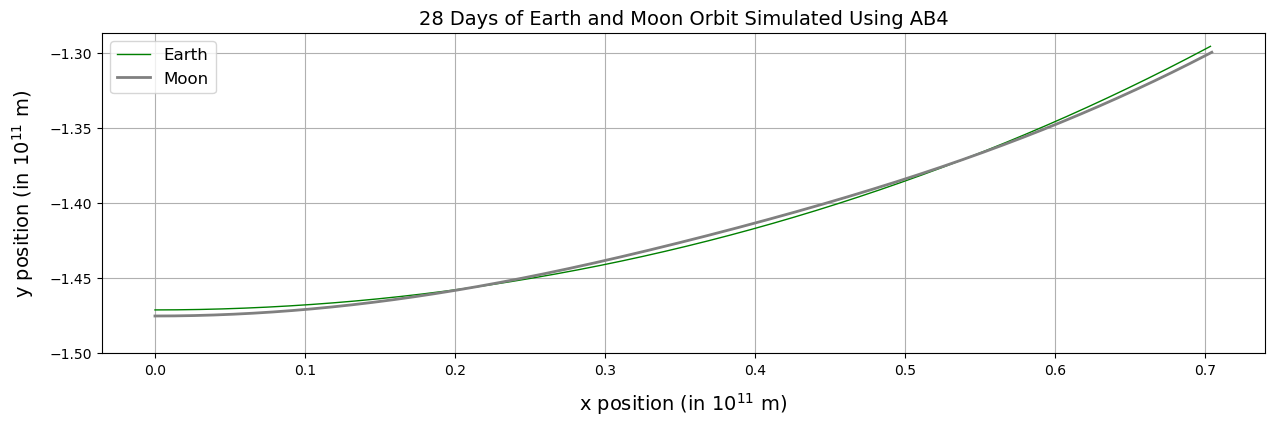

In [85]:
m1 = 1.989e30 # Sun 
m2 = 5.9724e24 # Earth 
m3 = 7.35e22 # Moon
r_1 = np.array([0, 0, 0]) # Sun
r_2 = np.array([0, -1.47095e11, 0]) # Earth
r_3 = np.array([0, -1.47095e11 - 0.4055e9 , 0]) # Assume the Moon is at apogee and Sun, Earth, Moon are colinear 
r_dot_1 = np.array([0, 0.10, 0]) 
r_dot_2 = np.array([30.29e3, 0, 0])
#r_dot_3 = np.array([31.26e3, 0, 0])
r_dot_3 = np.array([30.29e3 + 0.970e3, 0, 0]) # Assume the Moon has minimum orbital velocity at apogee
# 2. Decide on your time step and total simulation time
year = 3.1536e7 # 365 days
day = 3600 * 24 
T = day * 28
delta_t = 600

# This part is eiter ab4 or rk4
u_0 = [r_1, r_2, r_3, r_dot_1, r_dot_2, r_dot_3]
m = [m1, m2, m3]
u_rk4, times = rk_4_sim(u_0, m, T, delta_t)
u_ab4, times = ab_4(u_0, m, T, delta_t)

# Format rk4 data for 3-D projection
r1x = np.array([])
r1y = np.array([])
r1z = np.array([])

r2x = np.array([])
r2y = np.array([])
r2z = np.array([])

r3x = np.array([])
r3y = np.array([])
r3z = np.array([])

for u_k in u_rk4:
    
    for vector_num in range(len(u_k)):
        
        vector = u_k[vector_num]
            
        if vector_num == 0:

            r1x = np.append(r1x, vector[0])
            r1y = np.append(r1y, vector[1])
            r1z = np.append(r1z, vector[2])

        elif vector_num == 1:

            r2x = np.append(r2x, vector[0])
            r2y = np.append(r2y, vector[1])
            r2z = np.append(r2z, vector[2])

        elif vector_num == 2:

            r3x = np.append(r3x, vector[0])
            r3y = np.append(r3y, vector[1])
            r3z = np.append(r3z, vector[2])

plt.style.use('default')
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(211)
scale_factor = 1e11
ax.plot(r2x/scale_factor, r2y/scale_factor, color='green', linewidth=1, label='Earth')
ax.plot(r3x/scale_factor, r3y/scale_factor, color='gray', linewidth=2, label='Moon')
ticks1 = np.arange(-1.5, -1.25, 0.05)
ticks2 = np.arange(0, 0.71, 0.1)
ax.set_xlabel('x position (in $10^{11}$ m)', labelpad = 10, fontsize = 14)
ax.set_ylabel('y position (in $10^{11}$ m)', labelpad = 10, fontsize = 14)
ax.set_xticks(ticks2)
ax.set_yticks(ticks1)
ax.legend(loc = 'best', prop={'size': 12})
ax.set_title('28 Days of Earth and Moon Orbit Simulated Using RK4', fontsize = 14)
ax.set_aspect('equal')
ax.grid()
plt.savefig('28 days of earth and moon orbit using rk4')
# Format ab4 data for 3-D projection        
r1x = np.array([])
r1y = np.array([])
r1z = np.array([])

r2x = np.array([])
r2y = np.array([])
r2z = np.array([])

r3x = np.array([])
r3y = np.array([])
r3z = np.array([])

for u_k in u_ab4:
    
    for vector_num in range(len(u_k)):
        
        vector = u_k[vector_num]
            
        if vector_num == 0:

            r1x = np.append(r1x, vector[0])
            r1y = np.append(r1y, vector[1])
            r1z = np.append(r1z, vector[2])

        elif vector_num == 1:

            r2x = np.append(r2x, vector[0])
            r2y = np.append(r2y, vector[1])
            r2z = np.append(r2z, vector[2])

        elif vector_num == 2:

            r3x = np.append(r3x, vector[0])
            r3y = np.append(r3y, vector[1])
            r3z = np.append(r3z, vector[2])
                    
plt.style.use('default')
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(211)
scale_factor = 1e11
ax.plot(r2x/scale_factor, r2y/scale_factor, color='green', linewidth=1, label='Earth')
ax.plot(r3x/scale_factor, r3y/scale_factor, color='gray', linewidth=2, label='Moon')
ticks1 = np.arange(-1.5, -1.25, 0.05)
ticks2 = np.arange(0, 0.71, 0.1)
ax.set_xlabel('x position (in $10^{11}$ m)', labelpad = 10, fontsize = 14)
ax.set_ylabel('y position (in $10^{11}$ m)', labelpad = 10, fontsize = 14)
ax.set_xticks(ticks2)
ax.set_yticks(ticks1)
ax.legend(loc = 'best', prop={'size': 12})
ax.set_title('28 Days of Earth and Moon Orbit Simulated Using AB4', fontsize = 14)
ax.set_aspect('equal')
ax.grid()
plt.savefig('28 days of earth and moon orbit using ab4')

# Simulate 365 days of Sun, Earth, Moon Orbit using RK4 and AB4

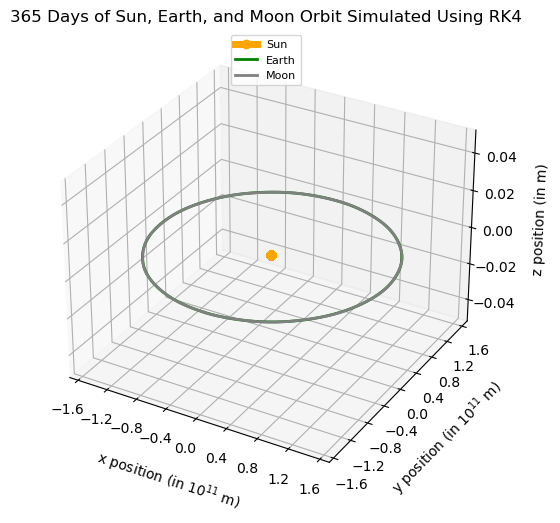

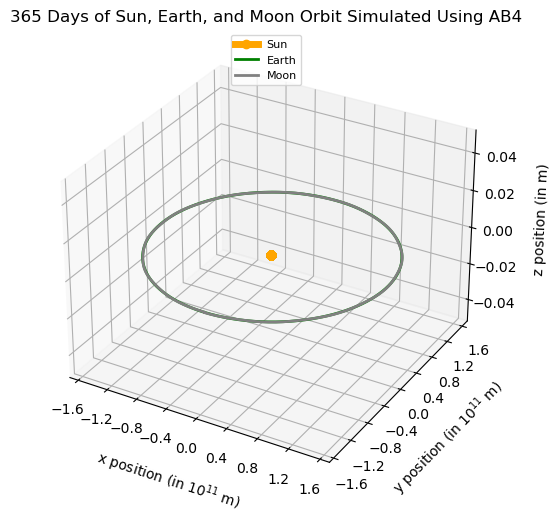

In [87]:
m1 = 1.989e30 # Sun 
m2 = 5.9724e24 # Earth 
m3 = 7.35e22 # Moon
r_1 = np.array([0, 0, 0]) # Sun
r_2 = np.array([0, -1.47095e11, 0]) # Earth
r_3 = np.array([0, -1.47095e11 - 0.4055e9 , 0]) # Assume the Moon is at apogee and Sun, Earth, Moon are colinear 
r_dot_1 = np.array([0, 0.10, 0]) 
r_dot_2 = np.array([30.29e3, 0, 0])
r_dot_3 = np.array([30.29e3 + 0.970e3, 0, 0]) # Assume the Moon has minimum orbital velocity at apogee
# 2. Decide on your time step and total simulation time
year = 3.1536e7 # 365 days
day = 3600 * 24 
T = year
delta_t = 600

# This part is eiter ab4 or rk4
u_0 = [r_1, r_2, r_3, r_dot_1, r_dot_2, r_dot_3] # normal
m = [m1, m2, m3]
u_rk4, times = rk_4_sim(u_0, m, T, delta_t)
u_ab4, times = ab_4(u_0, m, T, delta_t)

# Format rk4 data for 3-D projection
r1x = np.array([])
r1y = np.array([])
r1z = np.array([])

r2x = np.array([])
r2y = np.array([])
r2z = np.array([])

r3x = np.array([])
r3y = np.array([])
r3z = np.array([])

for u_k in u_rk4:
    
    for vector_num in range(len(u_k)):
        
        vector = u_k[vector_num]
            
        if vector_num == 0:

            r1x = np.append(r1x, vector[0])
            r1y = np.append(r1y, vector[1])
            r1z = np.append(r1z, vector[2])

        elif vector_num == 1:

            r2x = np.append(r2x, vector[0])
            r2y = np.append(r2y, vector[1])
            r2z = np.append(r2z, vector[2])

        elif vector_num == 2:

            r3x = np.append(r3x, vector[0])
            r3y = np.append(r3y, vector[1])
            r3z = np.append(r3z, vector[2])
            
scale_factor = 1e11
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection ='3d')
ax.plot3D(r1x/scale_factor, r1y/scale_factor, r1z, color='orange', linewidth=5, label='Sun', marker='o')
ax.plot3D(r2x/scale_factor, r2y/scale_factor, r2z, color='green', linewidth=2, label='Earth')
ax.plot3D(r3x/scale_factor, r3y/scale_factor, r3z, color='gray', linewidth=2, label='Moon')
ticks = np.arange(-1.6e11, 2.0e11, 0.4e11)/scale_factor
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.legend(loc = 'upper center', prop={'size': 8})
ax.set_xlabel('x position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_ylabel('y position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_zlabel( 'z position (in m)', labelpad = 10, fontsize = 10)
ax.set_title('365 Days of Sun, Earth, and Moon Orbit Simulated Using RK4')
plt.savefig('365 Days of Sun, Earth, and Moon Orbit Simulated Using RK4')

# Format ab4 data for 3-D projection
r1x = np.array([])
r1y = np.array([])
r1z = np.array([])

r2x = np.array([])
r2y = np.array([])
r2z = np.array([])

r3x = np.array([])
r3y = np.array([])
r3z = np.array([])

for u_k in u_ab4:
    
    for vector_num in range(len(u_k)):
        
        vector = u_k[vector_num]
            
        if vector_num == 0:

            r1x = np.append(r1x, vector[0])
            r1y = np.append(r1y, vector[1])
            r1z = np.append(r1z, vector[2])

        elif vector_num == 1:

            r2x = np.append(r2x, vector[0])
            r2y = np.append(r2y, vector[1])
            r2z = np.append(r2z, vector[2])

        elif vector_num == 2:

            r3x = np.append(r3x, vector[0])
            r3y = np.append(r3y, vector[1])
            r3z = np.append(r3z, vector[2])

scale_factor = 1e11
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection ='3d')
ax.plot3D(r1x/scale_factor, r1y/scale_factor, r1z, color='orange', linewidth=5, label='Sun', marker='o')
ax.plot3D(r2x/scale_factor, r2y/scale_factor, r2z, color='green', linewidth=2, label='Earth')
ax.plot3D(r3x/scale_factor, r3y/scale_factor, r3z, color='gray', linewidth=2, label='Moon')
ticks = np.arange(-1.6e11, 2.0e11, 0.4e11)/scale_factor
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.legend(loc = 'upper center', prop={'size': 8})
ax.set_xlabel('x position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_ylabel('y position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_zlabel( 'z position (in m)', labelpad = 10, fontsize = 10)
ax.set_title('365 Days of Sun, Earth, and Moon Orbit Simulated Using AB4')
plt.savefig('365 Days of Sun, Earth, and Moon Orbit Simulated Using AB4')

# Simulate 3 Years of Sun, Earth, Rogue Planet Orbit using RK4 and AB4

In [120]:
m1 = 1.989e30 # Sun 
m2 = 5.9724e24 # Earth 
third_body_mass = [4.2705e28, 0.1*m1, m1, 1.4*m1, 3*m1] # Rogue Planet UGPS 0722-05, red dwarf, another star, neutron star, black hole
m3 = third_body_mass[0]

r_1 = np.array([0, 0, 0]) # Sun
r_2 = np.array([0, -1.47095e11, 0]) # Earth
#r_3 = np.array([0, -2.891e11, 7.721e10]) # planet position 1/2 AU target
r_3 = np.array([2.16e11, -9.3e11, 1.91e11]) # aimed at mar's orbit from 15 degrees down 
r_dot_1 = np.array([0, 0.10, 0]) 
r_dot_2 = np.array([30.29e3, 0, 0])
#r_dot_3 = np.array([0, 45.3e3, -12.1e3]) # planet velocity 1/2 AU target
r_dot_3 = np.array([0, 45.3e3, -12.1e3])

# 2. Decide on your time step and total simulation time
year = 3.1536e7 # 365 days
T = year * 3 
delta_t = 600

# This part is ab4 
u_0 = [r_1, r_2, r_3, r_dot_1, r_dot_2, r_dot_3] # normal
m = [m1, m2, m3]
u_rk4, times = rk_4_sim(u_0, m, T, delta_t)
u_ab4, times = ab_4(u_0, m, T, delta_t)

# Format data for 3-D projection for RK4
r1x_rk4 = np.array([])
r1y_rk4 = np.array([])
r1z_rk4 = np.array([])

r2x_rk4 = np.array([])
r2y_rk4 = np.array([])
r2z_rk4 = np.array([])

r3x_rk4 = np.array([])
r3y_rk4 = np.array([])
r3z_rk4 = np.array([])

earth_sun_dist_rk4 = np.array([])

for u_k in u_rk4:
    count = count + 1
    for vector_num in range(len(u_k)):
        vector = u_k[vector_num]
            
        if vector_num == 0:

            r1x_rk4 = np.append(r1x_rk4, vector[0])
            r1y_rk4 = np.append(r1y_rk4, vector[1])
            r1z_rk4 = np.append(r1z_rk4, vector[2])

        elif vector_num == 1:

            r2x_rk4 = np.append(r2x_rk4, vector[0])
            r2y_rk4 = np.append(r2y_rk4, vector[1])
            r2z_rk4 = np.append(r2z_rk4, vector[2])
            
            es_dist = np.sqrt((r1x_rk4[-1]-r2x_rk4[-1])**2+(r1y_rk4[-1]-r2y_rk4[-1])**2+(r1z_rk4[-1]-r2z_rk4[-1])**2)
            earth_sun_dist_rk4 = np.append(earth_sun_dist_rk4, es_dist)

        elif vector_num == 2:

            r3x_rk4 = np.append(r3x_rk4, vector[0])
            r3y_rk4 = np.append(r3y_rk4, vector[1])
            r3z_rk4 = np.append(r3z_rk4, vector[2])
            
# Format data for 3-D projection for AB4
r1x_ab4 = np.array([])
r1y_ab4 = np.array([])
r1z_ab4 = np.array([])

r2x_ab4 = np.array([])
r2y_ab4 = np.array([])
r2z_ab4 = np.array([])

r3x_ab4 = np.array([])
r3y_ab4 = np.array([])
r3z_ab4 = np.array([])

earth_sun_dist_ab4 = np.array([])

for u_k in u_ab4:
    count = count + 1
    for vector_num in range(len(u_k)):
        vector = u_k[vector_num]
            
        if vector_num == 0:
            r1x_ab4 = np.append(r1x_ab4, vector[0])
            r1y_ab4 = np.append(r1y_ab4, vector[1])
            r1z_ab4 = np.append(r1z_ab4, vector[2])

        elif vector_num == 1:
            r2x_ab4 = np.append(r2x_ab4, vector[0])
            r2y_ab4 = np.append(r2y_ab4, vector[1])
            r2z_ab4 = np.append(r2z_ab4, vector[2])
            
            es_dist = np.sqrt((r1x_ab4[-1]-r2x_ab4[-1])**2+(r1y_ab4[-1]-r2y_ab4[-1])**2+(r1z_ab4[-1]-r2z_ab4[-1])**2)
            earth_sun_dist_ab4 = np.append(earth_sun_dist_ab4, es_dist)
            
        elif vector_num == 2:
            r3x_ab4 = np.append(r3x_ab4, vector[0])
            r3y_ab4 = np.append(r3y_ab4, vector[1])
            r3z_ab4 = np.append(r3z_ab4, vector[2])

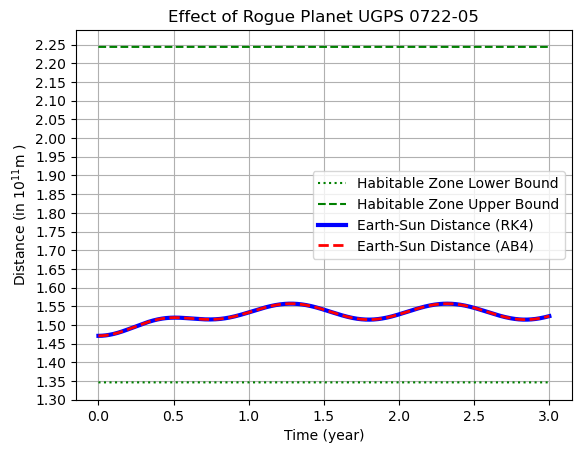

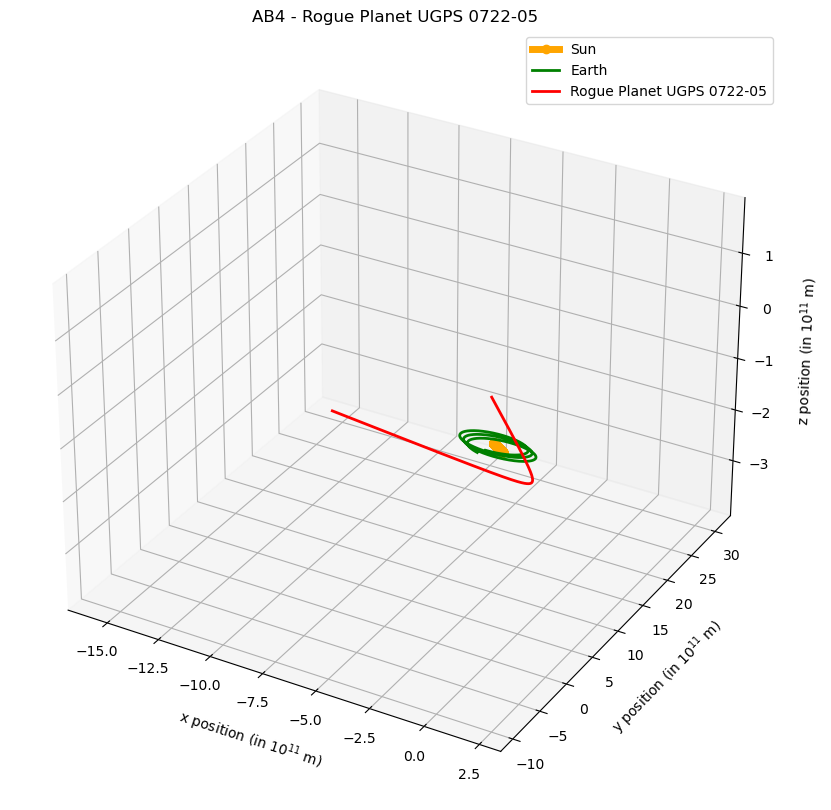

In [124]:
scale_factor = 1e11
# Habitable Zone 
AU = 1.496e11 # in meters 
# According to https://www.britannica.com/science/habitable-zone 0.9 to 1.5 AU
habitable_zone_upper = 1.5 * AU
habitable_zone_lower = 0.9 * AU  
hz_upper = np.empty(len(times))
hz_upper.fill(habitable_zone_upper/scale_factor)
hz_lower = np.empty(len(times))
hz_lower.fill(habitable_zone_lower/scale_factor)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(times/year, hz_lower, 'g:', label='Habitable Zone Lower Bound')
ax1.plot(times/year, hz_upper, 'g--', label='Habitable Zone Upper Bound')
ax1.plot(times/year, earth_sun_dist_rk4/scale_factor, 'b-', label='Earth-Sun Distance (RK4)', linewidth=3)
ax1.plot(times/year, earth_sun_dist_ab4/scale_factor, 'r--', label='Earth-Sun Distance (AB4)', linewidth=2)
ax1.set_yticks(np.arange(1.3, 2.3, step=0.05))
ax1.set_xlabel('Time (year)')
ax1.set_ylabel('Distance (in $10^{11}$m )')
ax1.set_title('Effect of Rogue Planet UGPS 0722-05', fontsize = 12)
ax1.grid()
ax1.legend()
plt.savefig('Earth-Sun Distance with Rogue Planet')

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection ='3d')
ax.plot3D(r1x_ab4/scale_factor, r1y_ab4/scale_factor, r1z_ab4/scale_factor, color='orange', linewidth=5, label='Sun', marker='o')
ax.plot3D(r2x_ab4/scale_factor, r2y_ab4/scale_factor, r2z_ab4/scale_factor, color='green', linewidth=2, label='Earth')
ax.plot3D(r3x_ab4/scale_factor, r3y_ab4/scale_factor, r3z_ab4/scale_factor, color='red', linewidth=2, label='Rogue Planet UGPS 0722-05')
ax.set_xlabel('x position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_ylabel('y position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_zlabel('z position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_title('AB4 - Rogue Planet UGPS 0722-05', fontsize = 12)
ax.legend()
plt.savefig('Orbit with Rogue Planet.png')

# Simulate 3 Years of Sun, Earth, Red Dwarf Orbit using RK4 and AB4

In [141]:
m1 = 1.989e30 # Sun 
m2 = 5.9724e24 # Earth 
third_body_mass = [4.2705e28, 0.1*m1, m1, 1.4*m1, 3*m1] # Rogue Planet UGPS 0722-05, red dwarf, another star, neutron star, black hole
m3 = third_body_mass[1]

r_1 = np.array([0, 0, 0]) # Sun
r_2 = np.array([0, -1.47095e11, 0]) # Earth
#r_3 = np.array([0, -2.891e11, 7.721e10]) # planet position 1/2 AU target
r_3 = np.array([2.16e11, -9.3e11, 1.91e11]) # aimed at mar's orbit from 15 degrees down 
r_dot_1 = np.array([0, 0.10, 0]) 
r_dot_2 = np.array([30.29e3, 0, 0])
#r_dot_3 = np.array([0, 45.3e3, -12.1e3]) # planet velocity 1/2 AU target
r_dot_3 = np.array([0, 45.3e3, -12.1e3])

# 2. Decide on your time step and total simulation time
year = 3.1536e7 # 365 days
T = year * 3
delta_t = 600

# This part is ab4 
u_0 = [r_1, r_2, r_3, r_dot_1, r_dot_2, r_dot_3] # normal
m = [m1, m2, m3]
u_rk4, times = rk_4_sim(u_0, m, T, delta_t)
u_ab4, times = ab_4(u_0, m, T, delta_t)

# Format data for 3-D projection for RK4
r1x_rk4 = np.array([])
r1y_rk4 = np.array([])
r1z_rk4 = np.array([])

r2x_rk4 = np.array([])
r2y_rk4 = np.array([])
r2z_rk4 = np.array([])

r3x_rk4 = np.array([])
r3y_rk4 = np.array([])
r3z_rk4 = np.array([])

earth_sun_dist_rk4 = np.array([])

for u_k in u_rk4:
    count = count + 1
    for vector_num in range(len(u_k)):
        vector = u_k[vector_num]
            
        if vector_num == 0:

            r1x_rk4 = np.append(r1x_rk4, vector[0])
            r1y_rk4 = np.append(r1y_rk4, vector[1])
            r1z_rk4 = np.append(r1z_rk4, vector[2])

        elif vector_num == 1:

            r2x_rk4 = np.append(r2x_rk4, vector[0])
            r2y_rk4 = np.append(r2y_rk4, vector[1])
            r2z_rk4 = np.append(r2z_rk4, vector[2])
            
            es_dist = np.sqrt((r1x_rk4[-1]-r2x_rk4[-1])**2+(r1y_rk4[-1]-r2y_rk4[-1])**2+(r1z_rk4[-1]-r2z_rk4[-1])**2)
            earth_sun_dist_rk4 = np.append(earth_sun_dist_rk4, es_dist)

        elif vector_num == 2:

            r3x_rk4 = np.append(r3x_rk4, vector[0])
            r3y_rk4 = np.append(r3y_rk4, vector[1])
            r3z_rk4 = np.append(r3z_rk4, vector[2])
            
# Format data for 3-D projection for AB4
r1x_ab4 = np.array([])
r1y_ab4 = np.array([])
r1z_ab4 = np.array([])

r2x_ab4 = np.array([])
r2y_ab4 = np.array([])
r2z_ab4 = np.array([])

r3x_ab4 = np.array([])
r3y_ab4 = np.array([])
r3z_ab4 = np.array([])

earth_sun_dist_ab4 = np.array([])

for u_k in u_ab4:
    count = count + 1
    for vector_num in range(len(u_k)):
        vector = u_k[vector_num]
            
        if vector_num == 0:
            r1x_ab4 = np.append(r1x_ab4, vector[0])
            r1y_ab4 = np.append(r1y_ab4, vector[1])
            r1z_ab4 = np.append(r1z_ab4, vector[2])

        elif vector_num == 1:
            r2x_ab4 = np.append(r2x_ab4, vector[0])
            r2y_ab4 = np.append(r2y_ab4, vector[1])
            r2z_ab4 = np.append(r2z_ab4, vector[2])
            
            es_dist = np.sqrt((r1x_ab4[-1]-r2x_ab4[-1])**2+(r1y_ab4[-1]-r2y_ab4[-1])**2+(r1z_ab4[-1]-r2z_ab4[-1])**2)
            earth_sun_dist_ab4 = np.append(earth_sun_dist_ab4, es_dist)
            
        elif vector_num == 2:
            r3x_ab4 = np.append(r3x_ab4, vector[0])
            r3y_ab4 = np.append(r3y_ab4, vector[1])
            r3z_ab4 = np.append(r3z_ab4, vector[2])

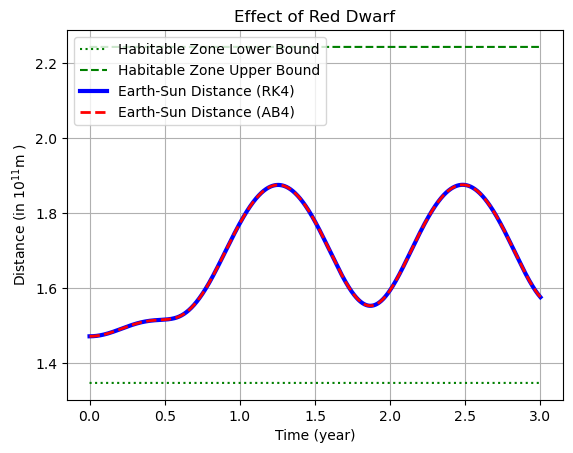

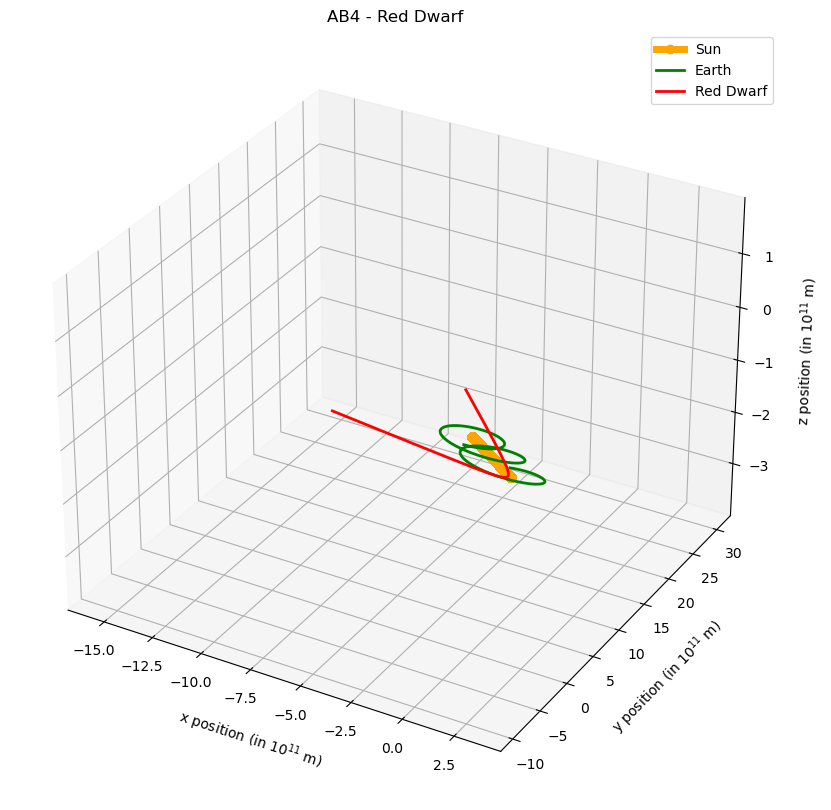

In [142]:
# Habitable Zone 
AU = 1.496e11 # in meters 
# According to https://www.britannica.com/science/habitable-zone 0.9 to 1.5 AU
habitable_zone_upper = 1.5 * AU
habitable_zone_lower = 0.9 * AU  
hz_upper = np.empty(len(times))
hz_upper.fill(habitable_zone_upper/scale_factor)
hz_lower = np.empty(len(times))
hz_lower.fill(habitable_zone_lower/scale_factor)

scale_factor = 1e11
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(times/year, hz_lower, 'g:', label='Habitable Zone Lower Bound')
ax1.plot(times/year, hz_upper, 'g--', label='Habitable Zone Upper Bound')
ax1.plot(times/year, earth_sun_dist_rk4/scale_factor, 'b-', label='Earth-Sun Distance (RK4)', linewidth=3)
ax1.plot(times/year, earth_sun_dist_ab4/scale_factor, 'r--', label='Earth-Sun Distance (AB4)', linewidth=2)
ax1.set_xlabel('Time (year)')
ax1.set_ylabel('Distance (in $10^{11}$m )')
ax1.set_title('Effect of Red Dwarf', fontsize = 12)
ax1.legend(loc = 'upper left')
ax1.grid()
plt.savefig('Earth-Sun Distance with Red Dwarf')

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection ='3d')
ax.plot3D(r1x_ab4/scale_factor, r1y_ab4/scale_factor, r1z_ab4/scale_factor, color='orange', linewidth=5, label='Sun', marker='o')
ax.plot3D(r2x_ab4/scale_factor, r2y_ab4/scale_factor, r2z_ab4/scale_factor, color='green', linewidth=2, label='Earth')
ax.plot3D(r3x_ab4/scale_factor, r3y_ab4/scale_factor, r3z_ab4/scale_factor, color='red', linewidth=2, label='Red Dwarf')
ax.set_xlabel('x position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_ylabel('y position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_zlabel('z position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_title('AB4 - Red Dwarf', fontsize = 12)
ax.legend()
plt.savefig('Orbit with Red Dwarf')

# Simulate 1 Year of Sun, Earth, Sun-Like Star Orbit using RK4 and AB4

In [127]:
m1 = 1.989e30 # Sun 
m2 = 5.9724e24 # Earth 
third_body_mass = [4.2705e28, 0.1*m1, m1, 1.4*m1, 3*m1] # Rogue Planet UGPS 0722-05, red dwarf, another star, neutron star, black hole
m3 = third_body_mass[2]

r_1 = np.array([0, 0, 0]) # Sun
r_2 = np.array([0, -1.47095e11, 0]) # Earth
#r_3 = np.array([0, -2.891e11, 7.721e10]) # planet position 1/2 AU target
r_3 = np.array([2.16e11, -9.3e11, 1.91e11]) # aimed at mar's orbit from 15 degrees down 
r_dot_1 = np.array([0, 0.10, 0]) 
r_dot_2 = np.array([30.29e3, 0, 0])
#r_dot_3 = np.array([0, 45.3e3, -12.1e3]) # planet velocity 1/2 AU target
r_dot_3 = np.array([0, 45.3e3, -12.1e3])

# 2. Decide on your time step and total simulation time
year = 3.1536e7 # 365 days
T = year
delta_t = 600

# This part is ab4 
u_0 = [r_1, r_2, r_3, r_dot_1, r_dot_2, r_dot_3] # normal
m = [m1, m2, m3]
u_rk4, times = rk_4_sim(u_0, m, T, delta_t)
u_ab4, times = ab_4(u_0, m, T, delta_t)

# Format data for 3-D projection for RK4
r1x_rk4 = np.array([])
r1y_rk4 = np.array([])
r1z_rk4 = np.array([])

r2x_rk4 = np.array([])
r2y_rk4 = np.array([])
r2z_rk4 = np.array([])

r3x_rk4 = np.array([])
r3y_rk4 = np.array([])
r3z_rk4 = np.array([])

earth_sun_dist_rk4 = np.array([])

for u_k in u_rk4:
    count = count + 1
    for vector_num in range(len(u_k)):
        vector = u_k[vector_num]
            
        if vector_num == 0:

            r1x_rk4 = np.append(r1x_rk4, vector[0])
            r1y_rk4 = np.append(r1y_rk4, vector[1])
            r1z_rk4 = np.append(r1z_rk4, vector[2])

        elif vector_num == 1:

            r2x_rk4 = np.append(r2x_rk4, vector[0])
            r2y_rk4 = np.append(r2y_rk4, vector[1])
            r2z_rk4 = np.append(r2z_rk4, vector[2])
            
            es_dist = np.sqrt((r1x_rk4[-1]-r2x_rk4[-1])**2+(r1y_rk4[-1]-r2y_rk4[-1])**2+(r1z_rk4[-1]-r2z_rk4[-1])**2)
            earth_sun_dist_rk4 = np.append(earth_sun_dist_rk4, es_dist)

        elif vector_num == 2:

            r3x_rk4 = np.append(r3x_rk4, vector[0])
            r3y_rk4 = np.append(r3y_rk4, vector[1])
            r3z_rk4 = np.append(r3z_rk4, vector[2])
            
# Format data for 3-D projection for AB4
r1x_ab4 = np.array([])
r1y_ab4 = np.array([])
r1z_ab4 = np.array([])

r2x_ab4 = np.array([])
r2y_ab4 = np.array([])
r2z_ab4 = np.array([])

r3x_ab4 = np.array([])
r3y_ab4 = np.array([])
r3z_ab4 = np.array([])

earth_sun_dist_ab4 = np.array([])

for u_k in u_ab4:
    count = count + 1
    for vector_num in range(len(u_k)):
        vector = u_k[vector_num]
            
        if vector_num == 0:
            r1x_ab4 = np.append(r1x_ab4, vector[0])
            r1y_ab4 = np.append(r1y_ab4, vector[1])
            r1z_ab4 = np.append(r1z_ab4, vector[2])

        elif vector_num == 1:
            r2x_ab4 = np.append(r2x_ab4, vector[0])
            r2y_ab4 = np.append(r2y_ab4, vector[1])
            r2z_ab4 = np.append(r2z_ab4, vector[2])
            
            es_dist = np.sqrt((r1x_ab4[-1]-r2x_ab4[-1])**2+(r1y_ab4[-1]-r2y_ab4[-1])**2+(r1z_ab4[-1]-r2z_ab4[-1])**2)
            earth_sun_dist_ab4 = np.append(earth_sun_dist_ab4, es_dist)
            
        elif vector_num == 2:
            r3x_ab4 = np.append(r3x_ab4, vector[0])
            r3y_ab4 = np.append(r3y_ab4, vector[1])
            r3z_ab4 = np.append(r3z_ab4, vector[2])

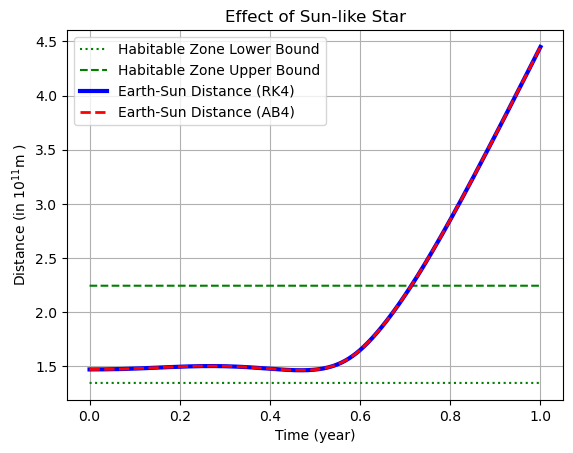

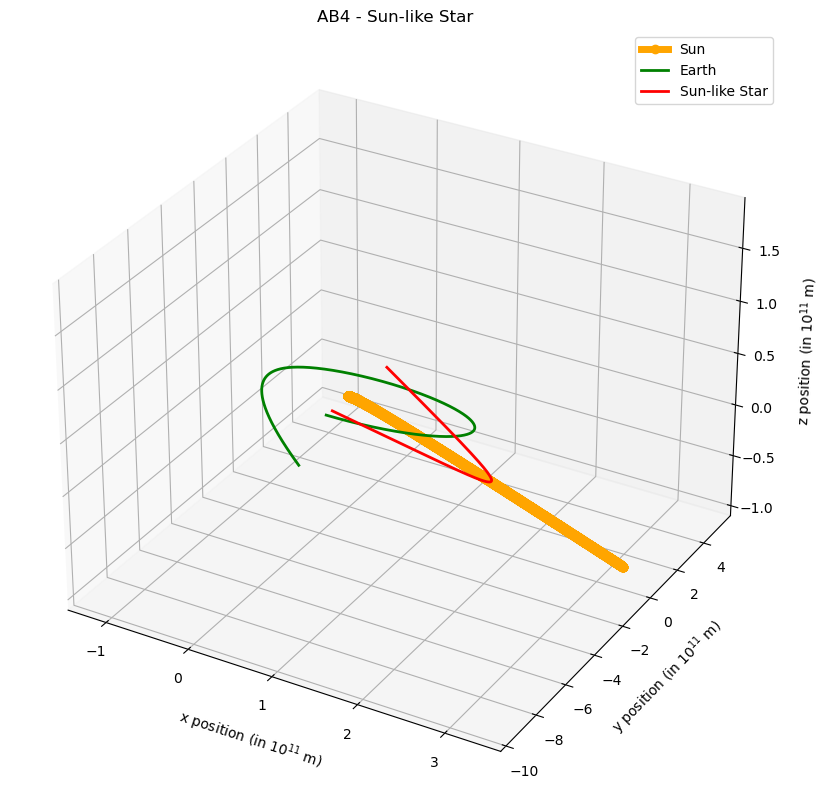

In [128]:
# Habitable Zone 
AU = 1.496e11 # in meters 
# According to https://www.britannica.com/science/habitable-zone 0.9 to 1.5 AU
habitable_zone_upper = 1.5 * AU
habitable_zone_lower = 0.9 * AU  
hz_upper = np.empty(len(times))
hz_upper.fill(habitable_zone_upper/scale_factor)
hz_lower = np.empty(len(times))
hz_lower.fill(habitable_zone_lower/scale_factor)

scale_factor = 1e11
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(times/year, hz_lower, 'g:', label='Habitable Zone Lower Bound')
ax1.plot(times/year, hz_upper, 'g--', label='Habitable Zone Upper Bound')
ax1.plot(times/year, earth_sun_dist_rk4/scale_factor, 'b-', label='Earth-Sun Distance (RK4)', linewidth=3)
ax1.plot(times/year, earth_sun_dist_ab4/scale_factor, 'r--', label='Earth-Sun Distance (AB4)', linewidth=2)
ax1.set_xlabel('Time (year)')
ax1.set_ylabel('Distance (in $10^{11}$m )')
ax1.set_title('Effect of Sun-like Star', fontsize = 12)
ax1.legend()
ax1.grid()
plt.savefig('Earth-Sun Distance with Sun-like Star')

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection ='3d')
ax.plot3D(r1x_ab4/scale_factor, r1y_ab4/scale_factor, r1z_ab4/scale_factor, color='orange', linewidth=5, label='Sun', marker='o')
ax.plot3D(r2x_ab4/scale_factor, r2y_ab4/scale_factor, r2z_ab4/scale_factor, color='green', linewidth=2, label='Earth')
ax.plot3D(r3x_ab4/scale_factor, r3y_ab4/scale_factor, r3z_ab4/scale_factor, color='red', linewidth=2, label='Sun-like Star')
ax.set_xlabel('x position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_ylabel('y position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_zlabel('z position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_title('AB4 - Sun-like Star', fontsize = 12)
ax.legend()
plt.savefig('Orbit with Sun-like Star')

# Simulate 0.75 Years of Sun, Earth, Neutron Star Orbit using RK4 and AB4

In [129]:
m1 = 1.989e30 # Sun 
m2 = 5.9724e24 # Earth 
third_body_mass = [4.2705e28, 0.1*m1, m1, 1.4*m1, 3*m1] # Rogue Planet UGPS 0722-05, red dwarf, another star, neutron star, black hole
m3 = third_body_mass[3]

r_1 = np.array([0, 0, 0]) # Sun
r_2 = np.array([0, -1.47095e11, 0]) # Earth
#r_3 = np.array([0, -2.891e11, 7.721e10]) # planet position 1/2 AU target
r_3 = np.array([2.16e11, -9.3e11, 1.91e11]) # aimed at mar's orbit from 15 degrees down 
r_dot_1 = np.array([0, 0.10, 0]) 
r_dot_2 = np.array([30.29e3, 0, 0])
#r_dot_3 = np.array([0, 45.3e3, -12.1e3]) # planet velocity 1/2 AU target
r_dot_3 = np.array([0, 45.3e3, -12.1e3])

# 2. Decide on your time step and total simulation time
year = 3.1536e7 # 365 days
T = year * 0.75
delta_t = 600

# This part is ab4 
u_0 = [r_1, r_2, r_3, r_dot_1, r_dot_2, r_dot_3] # normal
m = [m1, m2, m3]
u_rk4, times = rk_4_sim(u_0, m, T, delta_t)
u_ab4, times = ab_4(u_0, m, T, delta_t)

# Format data for 3-D projection for RK4
r1x_rk4 = np.array([])
r1y_rk4 = np.array([])
r1z_rk4 = np.array([])

r2x_rk4 = np.array([])
r2y_rk4 = np.array([])
r2z_rk4 = np.array([])

r3x_rk4 = np.array([])
r3y_rk4 = np.array([])
r3z_rk4 = np.array([])

earth_sun_dist_rk4 = np.array([])

for u_k in u_rk4:
    count = count + 1
    for vector_num in range(len(u_k)):
        vector = u_k[vector_num]
            
        if vector_num == 0:

            r1x_rk4 = np.append(r1x_rk4, vector[0])
            r1y_rk4 = np.append(r1y_rk4, vector[1])
            r1z_rk4 = np.append(r1z_rk4, vector[2])

        elif vector_num == 1:

            r2x_rk4 = np.append(r2x_rk4, vector[0])
            r2y_rk4 = np.append(r2y_rk4, vector[1])
            r2z_rk4 = np.append(r2z_rk4, vector[2])
            
            es_dist = np.sqrt((r1x_rk4[-1]-r2x_rk4[-1])**2+(r1y_rk4[-1]-r2y_rk4[-1])**2+(r1z_rk4[-1]-r2z_rk4[-1])**2)
            earth_sun_dist_rk4 = np.append(earth_sun_dist_rk4, es_dist)

        elif vector_num == 2:

            r3x_rk4 = np.append(r3x_rk4, vector[0])
            r3y_rk4 = np.append(r3y_rk4, vector[1])
            r3z_rk4 = np.append(r3z_rk4, vector[2])
            
# Format data for 3-D projection for AB4
r1x_ab4 = np.array([])
r1y_ab4 = np.array([])
r1z_ab4 = np.array([])

r2x_ab4 = np.array([])
r2y_ab4 = np.array([])
r2z_ab4 = np.array([])

r3x_ab4 = np.array([])
r3y_ab4 = np.array([])
r3z_ab4 = np.array([])

earth_sun_dist_ab4 = np.array([])

for u_k in u_ab4:
    count = count + 1
    for vector_num in range(len(u_k)):
        vector = u_k[vector_num]
            
        if vector_num == 0:
            r1x_ab4 = np.append(r1x_ab4, vector[0])
            r1y_ab4 = np.append(r1y_ab4, vector[1])
            r1z_ab4 = np.append(r1z_ab4, vector[2])

        elif vector_num == 1:
            r2x_ab4 = np.append(r2x_ab4, vector[0])
            r2y_ab4 = np.append(r2y_ab4, vector[1])
            r2z_ab4 = np.append(r2z_ab4, vector[2])
            
            es_dist = np.sqrt((r1x_ab4[-1]-r2x_ab4[-1])**2+(r1y_ab4[-1]-r2y_ab4[-1])**2+(r1z_ab4[-1]-r2z_ab4[-1])**2)
            earth_sun_dist_ab4 = np.append(earth_sun_dist_ab4, es_dist)
            
        elif vector_num == 2:
            r3x_ab4 = np.append(r3x_ab4, vector[0])
            r3y_ab4 = np.append(r3y_ab4, vector[1])
            r3z_ab4 = np.append(r3z_ab4, vector[2])

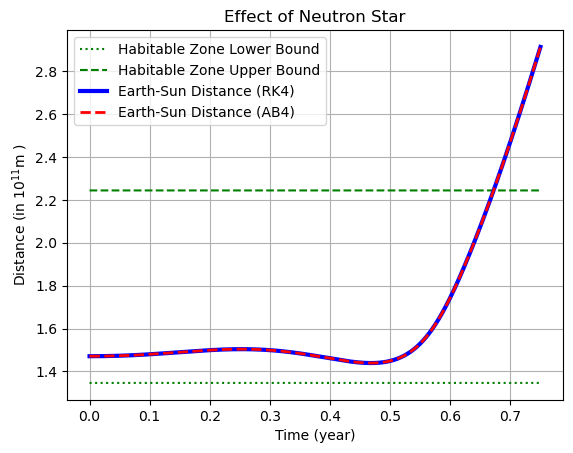

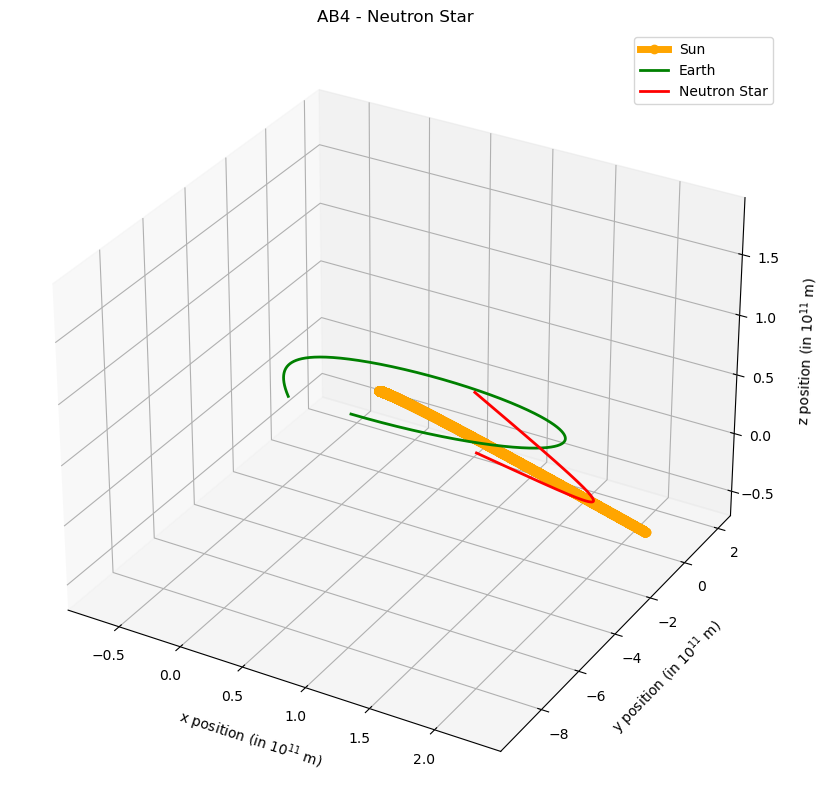

In [130]:
# Habitable Zone 
AU = 1.496e11 # in meters 
# According to https://www.britannica.com/science/habitable-zone 0.9 to 1.5 AU
habitable_zone_upper = 1.5 * AU
habitable_zone_lower = 0.9 * AU  
hz_upper = np.empty(len(times))
hz_upper.fill(habitable_zone_upper/scale_factor)
hz_lower = np.empty(len(times))
hz_lower.fill(habitable_zone_lower/scale_factor)

scale_factor = 1e11
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(times/year, hz_lower, 'g:', label='Habitable Zone Lower Bound')
ax1.plot(times/year, hz_upper, 'g--', label='Habitable Zone Upper Bound')
ax1.plot(times/year, earth_sun_dist_rk4/scale_factor, 'b-', label='Earth-Sun Distance (RK4)', linewidth=3)
ax1.plot(times/year, earth_sun_dist_ab4/scale_factor, 'r--', label='Earth-Sun Distance (AB4)', linewidth=2)
ax1.set_xlabel('Time (year)')
ax1.set_ylabel('Distance (in $10^{11}$m )')
ax1.set_title('Effect of Neutron Star', fontsize = 12)
ax1.legend()
ax1.grid()
plt.savefig('Earth-Sun Distance with Neutron Star')

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection ='3d')
ax.plot3D(r1x_ab4/scale_factor, r1y_ab4/scale_factor, r1z_ab4/scale_factor, color='orange', linewidth=5, label='Sun', marker='o')
ax.plot3D(r2x_ab4/scale_factor, r2y_ab4/scale_factor, r2z_ab4/scale_factor, color='green', linewidth=2, label='Earth')
ax.plot3D(r3x_ab4/scale_factor, r3y_ab4/scale_factor, r3z_ab4/scale_factor, color='red', linewidth=2, label='Neutron Star')
ax.set_xlabel('x position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_ylabel('y position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_zlabel('z position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_title('AB4 - Neutron Star', fontsize = 12)
ax.legend()
plt.savefig('Orbit with Neutron Star')

# Simulate 0.75 Year of Sun, Earth, Small Black Hole Orbit using RK4 and AB4

In [131]:
m1 = 1.989e30 # Sun 
m2 = 5.9724e24 # Earth 
third_body_mass = [4.2705e28, 0.1*m1, m1, 1.4*m1, 3*m1] # Rogue Planet UGPS 0722-05, red dwarf, another star, neutron star, black hole
m3 = third_body_mass[4]

r_1 = np.array([0, 0, 0]) # Sun
r_2 = np.array([0, -1.47095e11, 0]) # Earth
#r_3 = np.array([0, -2.891e11, 7.721e10]) # planet position 1/2 AU target
r_3 = np.array([2.16e11, -9.3e11, 1.91e11]) # aimed at mar's orbit from 15 degrees down 
r_dot_1 = np.array([0, 0.10, 0]) 
r_dot_2 = np.array([30.29e3, 0, 0])
#r_dot_3 = np.array([0, 45.3e3, -12.1e3]) # planet velocity 1/2 AU target
r_dot_3 = np.array([0, 45.3e3, -12.1e3])

# 2. Decide on your time step and total simulation time
year = 3.1536e7 # 365 days
T = year * 0.75
delta_t = 600

# This part is ab4 
u_0 = [r_1, r_2, r_3, r_dot_1, r_dot_2, r_dot_3] # normal
m = [m1, m2, m3]
u_rk4, times = rk_4_sim(u_0, m, T, delta_t)
u_ab4, times = ab_4(u_0, m, T, delta_t)

# Format data for 3-D projection for RK4
r1x_rk4 = np.array([])
r1y_rk4 = np.array([])
r1z_rk4 = np.array([])

r2x_rk4 = np.array([])
r2y_rk4 = np.array([])
r2z_rk4 = np.array([])

r3x_rk4 = np.array([])
r3y_rk4 = np.array([])
r3z_rk4 = np.array([])

earth_sun_dist_rk4 = np.array([])

for u_k in u_rk4:
    count = count + 1
    for vector_num in range(len(u_k)):
        vector = u_k[vector_num]
            
        if vector_num == 0:

            r1x_rk4 = np.append(r1x_rk4, vector[0])
            r1y_rk4 = np.append(r1y_rk4, vector[1])
            r1z_rk4 = np.append(r1z_rk4, vector[2])

        elif vector_num == 1:

            r2x_rk4 = np.append(r2x_rk4, vector[0])
            r2y_rk4 = np.append(r2y_rk4, vector[1])
            r2z_rk4 = np.append(r2z_rk4, vector[2])
            
            es_dist = np.sqrt((r1x_rk4[-1]-r2x_rk4[-1])**2+(r1y_rk4[-1]-r2y_rk4[-1])**2+(r1z_rk4[-1]-r2z_rk4[-1])**2)
            earth_sun_dist_rk4 = np.append(earth_sun_dist_rk4, es_dist)

        elif vector_num == 2:

            r3x_rk4 = np.append(r3x_rk4, vector[0])
            r3y_rk4 = np.append(r3y_rk4, vector[1])
            r3z_rk4 = np.append(r3z_rk4, vector[2])
            
# Format data for 3-D projection for AB4
r1x_ab4 = np.array([])
r1y_ab4 = np.array([])
r1z_ab4 = np.array([])

r2x_ab4 = np.array([])
r2y_ab4 = np.array([])
r2z_ab4 = np.array([])

r3x_ab4 = np.array([])
r3y_ab4 = np.array([])
r3z_ab4 = np.array([])

earth_sun_dist_ab4 = np.array([])

for u_k in u_ab4:
    count = count + 1
    for vector_num in range(len(u_k)):
        vector = u_k[vector_num]
            
        if vector_num == 0:
            r1x_ab4 = np.append(r1x_ab4, vector[0])
            r1y_ab4 = np.append(r1y_ab4, vector[1])
            r1z_ab4 = np.append(r1z_ab4, vector[2])

        elif vector_num == 1:
            r2x_ab4 = np.append(r2x_ab4, vector[0])
            r2y_ab4 = np.append(r2y_ab4, vector[1])
            r2z_ab4 = np.append(r2z_ab4, vector[2])
            
            es_dist = np.sqrt((r1x_ab4[-1]-r2x_ab4[-1])**2+(r1y_ab4[-1]-r2y_ab4[-1])**2+(r1z_ab4[-1]-r2z_ab4[-1])**2)
            earth_sun_dist_ab4 = np.append(earth_sun_dist_ab4, es_dist)
            
        elif vector_num == 2:
            r3x_ab4 = np.append(r3x_ab4, vector[0])
            r3y_ab4 = np.append(r3y_ab4, vector[1])
            r3z_ab4 = np.append(r3z_ab4, vector[2])

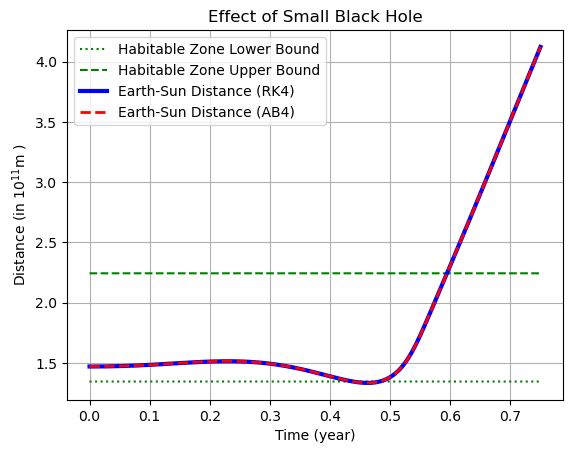

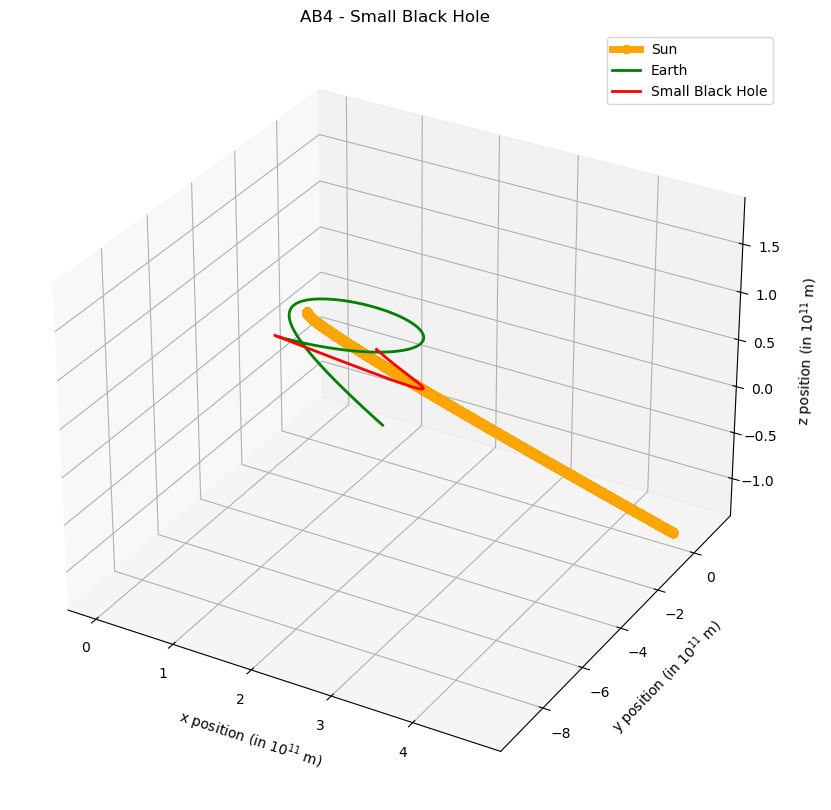

In [132]:
# Habitable Zone 
AU = 1.496e11 # in meters 
# According to https://www.britannica.com/science/habitable-zone 0.9 to 1.5 AU
habitable_zone_upper = 1.5 * AU
habitable_zone_lower = 0.9 * AU  
hz_upper = np.empty(len(times))
hz_upper.fill(habitable_zone_upper/scale_factor)
hz_lower = np.empty(len(times))
hz_lower.fill(habitable_zone_lower/scale_factor)

scale_factor = 1e11
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(times/year, hz_lower, 'g:', label='Habitable Zone Lower Bound')
ax1.plot(times/year, hz_upper, 'g--', label='Habitable Zone Upper Bound')
ax1.plot(times/year, earth_sun_dist_rk4/scale_factor, 'b-', label='Earth-Sun Distance (RK4)', linewidth=3)
ax1.plot(times/year, earth_sun_dist_ab4/scale_factor, 'r--', label='Earth-Sun Distance (AB4)', linewidth=2)
ax1.set_xlabel('Time (year)')
ax1.set_ylabel('Distance (in $10^{11}$m )')
ax1.set_title('Effect of Small Black Hole', fontsize = 12)
ax1.legend()
ax1.grid()
plt.savefig('Earth-Sun Distance with Black Hole')

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection ='3d')
ax.plot3D(r1x_ab4/scale_factor, r1y_ab4/scale_factor, r1z_ab4/scale_factor, color='orange', linewidth=5, label='Sun', marker='o')
ax.plot3D(r2x_ab4/scale_factor, r2y_ab4/scale_factor, r2z_ab4/scale_factor, color='green', linewidth=2, label='Earth')
ax.plot3D(r3x_ab4/scale_factor, r3y_ab4/scale_factor, r3z_ab4/scale_factor, color='red', linewidth=2, label='Small Black Hole')
ax.set_xlabel('x position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_ylabel('y position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_zlabel('z position (in $10^{11}$ m)', labelpad = 10, fontsize = 10)
ax.set_title('AB4 - Small Black Hole', fontsize = 12)
ax.legend()
plt.savefig('Orbit with Black Hole')